# Building Neural Nets in TensorFlow

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

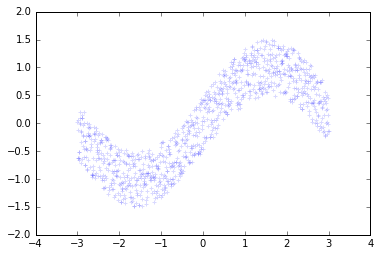

In [2]:
n_observations = 1000
xs = np.linspace(-3, 3, n_observations)

# we're going to teach our network to represent a function that looks like a sine wave.
#To make it difficult, we are going to create a noisy representation of a sine wave by adding uniform noise.
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.scatter(xs, ys, alpha=0.15, marker='+')

In [3]:
# variables which we need to fill in when we are ready to compute the graph.
# We'll pass in the values of the x-axis to a placeholder called X.
X = tf.placeholder(tf.float32, name='X')

# And we'll also specify what the y values should be using another placeholder, y.
Y = tf.placeholder(tf.float32, name='Y')

In [4]:
# We represent weights as TF variables as we don't need to feed in the weights to our network,
#the network needs to learn and update the weights
W = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1), name='weight')

# For bias variables, we usually start with a constant value of 0.
B = tf.Variable(tf.constant([1], dtype=tf.float32), name='bias')

# Now we can scale our input placeholder by W, and add our bias, b.
Y_pred = X * W + B

In [5]:
def distance(p1, p2):
    return tf.abs(p1 - p2)

In [6]:
cost = tf.reduce_mean(distance(Y_pred, Y))

In [7]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

/home/abhinav/miniconda3/envs/cadl/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


1.05264
0.980727
0.910355
0.841925
0.774722
0.709221
0.650474
0.599825
0.558984
0.526184
0.50212
0.48316
0.468818
0.457233
0.448148
0.440734
0.434894
0.430762
0.427475
0.425232
0.423593
0.422343
0.421359
0.420662
0.420205
0.419819
0.419618
0.419468
0.419353
0.419279
0.419226
0.419186
0.419152
0.419127
0.419101


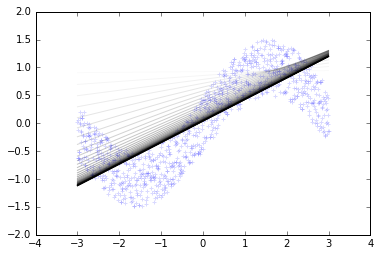

In [8]:
# We create a session to use the graph
n_iterations = 500

# Plot the true data distribution
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha=0.15, marker='+')
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set `W` and `b` to their initial random normal value.
    sess.run(tf.initialize_all_variables())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        sess.run(optimizer, feed_dict={X: xs, Y: ys})
        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

        # every 10 iterations
        if it_i % 10 == 0:
            # let's plot the x versus the predicted y
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)

            # We'll draw points as a scatter plot just like before
            # Except we'll also scale the alpha value so that it gets
            # darker as the iterations get closer to the end
            ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
            fig.show()
            plt.draw()

            # And let's print our training cost: mean of absolute differences
            print(training_cost)

        # Allow the training to quit if we've reached a minimum
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break

        # Keep track of the training cost
        prev_training_cost = training_cost

### A Small Detour: Stochastic and Mini Batch Gradient Descent

* In neural networks it is preferred to feed in batches of input examples to the network - Thus mini batch
* Neural networks love ordering in the data, therefore we should randomize the order of the data - Thus stochastic

In [9]:
idxs = np.arange(100)
batch_size = 10
n_batches = len(idxs) // batch_size
for batch_i in range(n_batches):
    print(idxs[batch_i * batch_size : (batch_i + 1) * batch_size])

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]
[70 71 72 73 74 75 76 77 78 79]
[80 81 82 83 84 85 86 87 88 89]
[90 91 92 93 94 95 96 97 98 99]


In [10]:
rand_idxs = np.random.permutation(idxs)
batch_size = 10
n_batches = len(rand_idxs) // batch_size
print('# of batches:', n_batches)
for batch_i in range(n_batches):
    print(rand_idxs[batch_i * batch_size : (batch_i + 1) * batch_size])

# of batches: 10
[71 70 49 23 80 41 25 21 14  9]
[30 35 56 26 75 68 96 17 38 59]
[31 27  4 84 32 20 61  6 92 39]
[36 79 76  7 87 22 66  5 28 95]
[24 73 44 12 34 55 57  8 99 98]
[97 94 78 18  3 50 83 43 72 33]
[45 93 37 90 88 54 16 86 77 53]
[48 74 64 46 69 40  2 51 42 15]
[89 52 91 60 10 81 11 47 13 85]
[63  1 19 29 58 82 62 67 65  0]


Now we will use stochastic mini-batch gradient descent and convert our code into a function

In [11]:
def train(X, Y, Y_pred, n_iterations=100, batch_size=200, learning_rate=0.02):
    cost = tf.reduce_mean(distance(Y_pred, Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    fig, ax = plt.subplots(1, 1)
    ax.scatter(xs, ys, alpha=0.15, marker='+')
    ax.set_xlim([-4, 4])
    ax.set_ylim([-2, 2])
    with tf.Session() as sess:
        # Here we tell tensorflow that we want to initialize all
        # the variables in the graph so we can use them
        # This will set W and b to their initial random normal value.
        sess.run(tf.initialize_all_variables())

        # We now run a loop over epochs
        prev_training_cost = 0.0
        for it_i in range(n_iterations):
            idxs = np.random.permutation(range(len(xs)))
            n_batches = len(idxs) // batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
                sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

            training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

            if it_i % 10 == 0:
                ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
                ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
                print(training_cost)
    fig.show()
    plt.draw()

### Using more neurons

1.71608
0.95611
1.53678
2.18765
2.01716
2.49252
2.02813
2.34698
1.56521
2.60013


/home/abhinav/miniconda3/envs/cadl/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


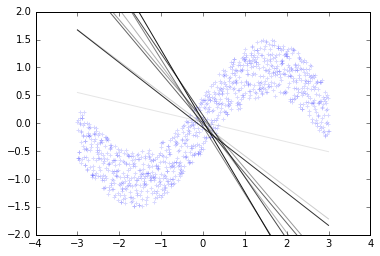

In [12]:
# We're going to multiply our input by 100 values, creating an "inner layer"
# of 100 neurons.
n_neurons = 100
W = tf.Variable(tf.random_normal([1, n_neurons], stddev=0.1))

# and allow for n_neurons additions on each of those neurons
b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]))

# Instead of multiplying directly, we use tf.matmul to perform a
# matrix multiplication
h = tf.matmul(tf.expand_dims(X, 1), W) + b

# Create the operation to add every neuron's output
Y_pred = tf.reduce_sum(h, 1)

# Retrain with our new Y_pred
train(X, Y, Y_pred)

### Using Non-linearities/activation functions

The data in the real world is not linear and we need more complex functions to fit it to greater accuracy. Neural networks use non-linearities (also called activation functions) to achieve this. Deep neural networks combine a series of linear and non-linear opearations, by stacking enough of these layers, they are able to learn complex functions.

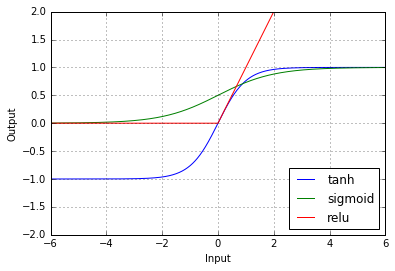

In [13]:
sess = tf.InteractiveSession()
x = np.linspace(-6,6,1000)
plt.plot(x, tf.nn.tanh(x).eval(), label='tanh')
plt.plot(x, tf.nn.sigmoid(x).eval(), label='sigmoid')
plt.plot(x, tf.nn.relu(x).eval(), label='relu')
plt.legend(loc='lower right')
plt.xlim([-6, 6])
plt.ylim([-2, 2])
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid('on')
sess.close()

1.86555
0.281915
0.264005
0.259055
0.257318
0.256457
0.256356
0.255684
0.255561
0.255171


/home/abhinav/miniconda3/envs/cadl/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


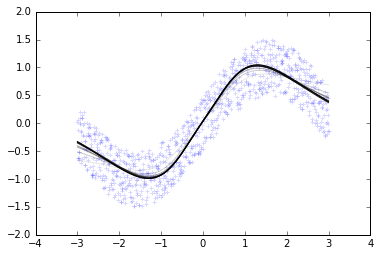

In [14]:
# We're going to multiply our input by 10 values, creating an "inner layer"
# of n_neurons neurons.
n_neurons = 10
W = tf.Variable(tf.random_normal([1, n_neurons]), name='W')

# and allow for n_neurons additions on each of those neurons
b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]), name='b')

# Instead of just multiplying, we'll put our n_neuron multiplications through a non-linearity, the tanh function.
h = tf.nn.tanh(tf.matmul(tf.expand_dims(X, 1), W) + b, name='h')

Y_pred = tf.reduce_sum(h, 1)

# And retrain w/ our new Y_pred
train(X, Y, Y_pred)

## Creating Deeper Networks

Let's convert the above code into a function

In [15]:
def linear(X, n_input, n_output, activation=None):
    W = tf.Variable(tf.random_normal([n_input, n_output], stddev=0.1), name='W')
    b = tf.Variable(
        tf.constant(0, dtype=tf.float32, shape=[n_output]), name='b')
    h = tf.nn.tanh(tf.matmul(X, W) + b, name='h')
    return h

Let's take a look at our graph

In [16]:
# first clear the graph
from tensorflow.python.framework import ops
ops.reset_default_graph()

# let's get the current graph
g = tf.get_default_graph()

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

# let's create a new network
X = tf.placeholder(tf.float32, name='X')
h = linear(X, 2, 10)

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'random_normal/shape',
 'random_normal/mean',
 'random_normal/stddev',
 'random_normal/RandomStandardNormal',
 'random_normal/mul',
 'random_normal',
 'W',
 'W/Assign',
 'W/read',
 'Const',
 'b',
 'b/Assign',
 'b/read',
 'MatMul',
 'add',
 'h']

As such, the names in the graph don't make a lot of sense, we can do better by using scopes

In [17]:
def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or "linear"):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        h = tf.matmul(X, W) + b
        if activation is not None:
            h = activation(h)
        return h

In [18]:
# first clear the graph
from tensorflow.python.framework import ops
ops.reset_default_graph()

# let's get the current graph
g = tf.get_default_graph()

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

# let's create a new network
X = tf.placeholder(tf.float32, name='X')
h = linear(X, 2, 10, scope='layer1')

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'layer1/W',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b',
 'layer1/b/Initializer/Const',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add']

In [19]:
# Let's connect the output of our last network to another one!

# Wow we just made a Deep Network!  Let's make it deeper!
h2 = linear(h, 10, 10, scope='layer2')

# Again!
h3 = linear(h2, 10, 3, scope='layer3')

# Now when we look at the names of the operations in the graph, we can directly see which operations belong to each layer!
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'layer1/W',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b',
 'layer1/b/Initializer/Const',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add',
 'layer2/W',
 'layer2/W/Initializer/random_normal/shape',
 'layer2/W/Initializer/random_normal/mean',
 'layer2/W/Initializer/random_normal/stddev',
 'layer2/W/Initializer/random_normal/RandomStandardNormal',
 'layer2/W/Initializer/random_normal/mul',
 'layer2/W/Initializer/random_normal',
 'layer2/W/Assign',
 'layer2/W/read',
 'layer2/b',
 'layer2/b/Initializer/Const',
 'layer2/b/Assign',
 'layer2/b/read',
 'layer2/MatMul',
 'layer2/add',
 'layer3/W',
 'layer3/W/Initializer/random_normal/shape',
 'layer3/W/Initializer/random_normal/mean',
 'laye

## Example of a deep neural network: Image Painting

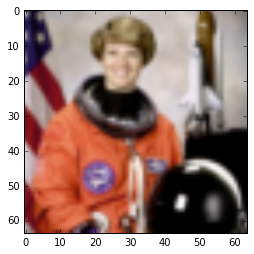

In [20]:
from skimage.data import astronaut
from scipy.misc import imresize
img = imresize(astronaut(), (64, 64))
plt.imshow(img)

In [21]:
# We'll first collect all the positions in the image in our list, xs
xs = []

# And the corresponding colors for each of these positions
ys = []

# Now loop over the image
for row_i in range(img.shape[0]):
    for col_i in range(img.shape[1]):
        # And store the inputs
        xs.append([row_i, col_i])
        # And outputs that the network needs to learn to predict
        ys.append(img[row_i, col_i])

# we'll convert our lists to arrays
xs = np.array(xs)
ys = np.array(ys)

# Normalizing the input by the mean and standard deviation
xs = (xs - np.mean(xs)) / np.std(xs)

# and print the shapes
xs.shape, ys.shape

((4096, 2), (4096, 3))

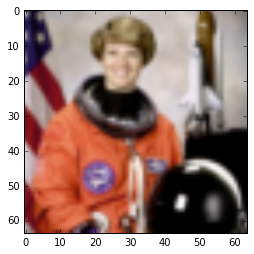

In [22]:
plt.imshow(ys.reshape(img.shape))

In [23]:
X = tf.placeholder(tf.float32, shape=[None, 2], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 3], name='Y')

In [24]:
n_neurons = [2, 64, 64, 64, 64, 64, 64, 3]

current_input = X
for layer_i in range(1, len(n_neurons)):
    current_input = linear(
        X=current_input,
        n_input=n_neurons[layer_i - 1],
        n_output=n_neurons[layer_i],
        activation=tf.nn.relu if (layer_i+1) < len(n_neurons) else None,
        scope='layer_' + str(layer_i))
Y_pred = current_input

In [25]:
cost = tf.reduce_mean(
    tf.reduce_sum(distance(Y_pred, Y), 1))

In [26]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

0 170.16
1 162.851
2 155.866
3 149.878
4 145.245
5 142.502
6 139.341
7 136.718
8 136.566
9 132.958
10 134.628
11 130.108
12 129.281
13 127.356
14 127.347
15 121.86
16 116.299
17 107.605
18 105.619
19 103.876


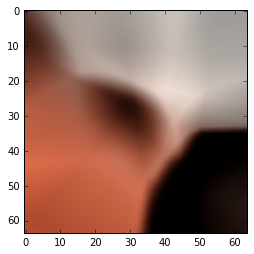

20 102.008
21 103.449
22 99.8782
23 98.0849
24 97.7744
25 100.152
26 96.4766
27 97.5056
28 95.0019
29 103.871
30 95.196
31 95.3991
32 94.4547
33 97.4484
34 93.3363
35 92.8767
36 94.1984
37 93.7309
38 93.849
39 92.7537


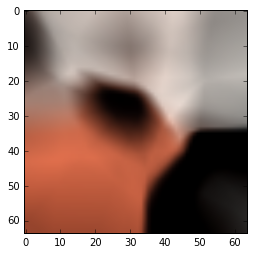

40 93.8076
41 92.5022
42 91.4972
43 93.572
44 97.0106
45 98.8863
46 90.9877
47 90.1227
48 90.1098
49 92.1776
50 94.646
51 91.1103
52 89.4432
53 91.4275
54 90.1175
55 89.573
56 89.9819
57 88.3491
58 88.5805
59 88.7466


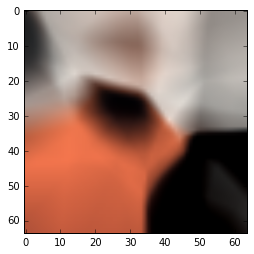

60 87.5089
61 87.7869
62 88.7703
63 91.2293
64 94.5586
65 86.0956
66 88.3899
67 88.3452
68 89.1314
69 85.8295
70 86.3511
71 93.4737
72 89.1539
73 96.3706
74 88.2398
75 86.3877
76 84.4969
77 94.4834
78 86.3163
79 86.9687


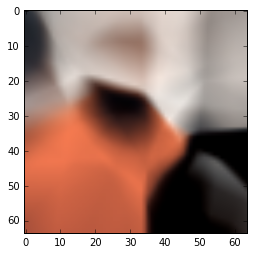

80 84.4335
81 84.8192
82 85.9006
83 84.638
84 84.6222
85 88.882
86 81.655
87 82.7599
88 83.4646
89 83.9003
90 82.7157
91 84.6167
92 86.6117
93 80.1572
94 81.6285
95 81.1508
96 81.098
97 82.706
98 81.4364
99 82.2026


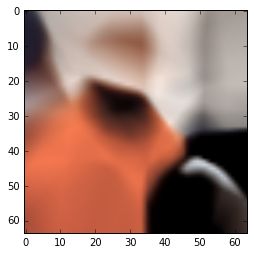

100 81.8435
101 77.8025
102 83.4761
103 78.4154
104 79.5163
105 80.229
106 76.7343
107 78.0207
108 77.4997
109 78.586
110 75.6691
111 81.181
112 77.1058
113 75.7517
114 73.9657
115 75.2719
116 75.0048
117 74.3056
118 75.0131
119 76.9844


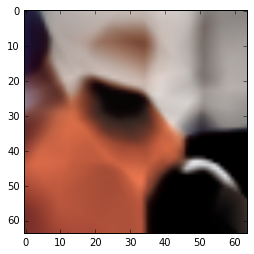

120 76.8262
121 76.5816
122 78.3423
123 75.7194
124 75.983
125 75.8391
126 70.8796
127 74.0905
128 80.458
129 72.4132
130 75.8507
131 70.9952
132 78.2759
133 70.9258
134 73.4845
135 82.1505
136 71.6604
137 70.6333
138 70.1795
139 70.1924


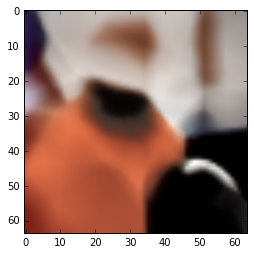

140 72.6082
141 70.0855
142 69.6441
143 69.0676
144 72.097
145 66.8112
146 69.7504
147 70.909
148 67.688
149 67.4667
150 68.8641
151 64.9979
152 73.5249
153 64.9971
154 68.5542
155 71.8985
156 66.3167
157 66.6122
158 65.812
159 71.2453


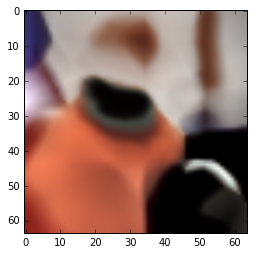

160 63.8322
161 65.4843
162 65.1299
163 66.8872
164 63.4946
165 66.3926
166 65.09
167 64.2726
168 65.0399
169 66.5567
170 67.3793
171 66.1404
172 63.9359
173 62.1138
174 62.3654
175 80.394
176 63.8997
177 64.8031
178 63.7057
179 65.5048


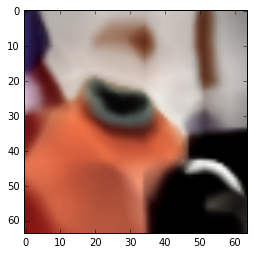

180 65.2169
181 61.6575
182 63.6617
183 62.532
184 61.9202
185 59.3224
186 60.9991
187 60.8708
188 59.2066
189 59.571
190 59.2647
191 62.4087
192 58.0536
193 56.7768
194 60.3707
195 56.5084
196 69.1453
197 62.1946
198 59.396
199 65.0914


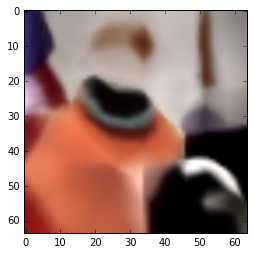

200 63.8946
201 56.1399
202 60.6549
203 59.1305
204 58.8664
205 58.5006
206 59.3048
207 56.2398
208 59.6148
209 56.1368
210 60.3077
211 55.805
212 61.978
213 57.3597
214 58.0308
215 57.5322
216 55.5158
217 60.7665
218 54.3158
219 56.9645


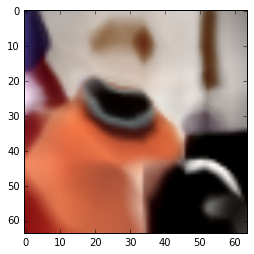

220 60.3737
221 55.4598
222 53.9424
223 59.812
224 61.7213
225 57.2446
226 56.3274
227 55.8397
228 59.434
229 55.2989
230 57.7571
231 55.8145
232 55.4792
233 57.014
234 54.3447
235 58.3339
236 53.8586
237 57.8304
238 57.8753
239 52.986


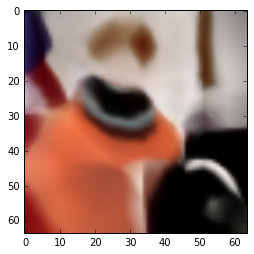

240 55.5004
241 57.9889
242 52.3095
243 57.7793
244 55.114
245 54.9019
246 54.0861
247 56.5741
248 59.6785
249 57.9922
250 53.8168
251 53.4729
252 56.182
253 56.008
254 53.8652
255 52.1149
256 56.3526
257 55.2519
258 53.2304
259 56.6945


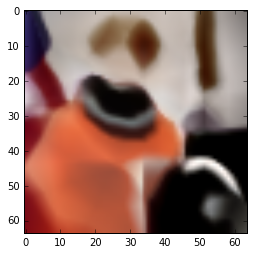

260 58.2272
261 54.3474
262 53.7664
263 53.2152
264 53.7184
265 58.4764
266 55.567
267 51.4483
268 58.3927
269 56.4832
270 53.6546
271 52.6187
272 51.7283
273 50.1308
274 54.7354
275 50.6456
276 53.1065
277 55.1761
278 58.3661
279 52.9547


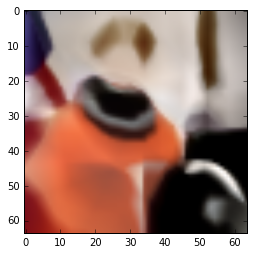

280 53.4336
281 53.7402
282 48.6628
283 52.2227
284 58.7265
285 55.6191
286 53.1754
287 52.8105
288 54.1853
289 51.3049
290 50.7815
291 51.0238
292 48.3493
293 59.2116
294 52.5695
295 51.0068
296 49.3785
297 51.9022
298 55.9259
299 52.6189


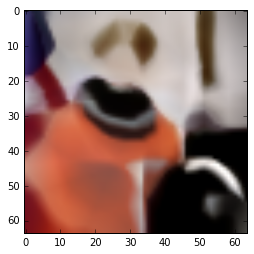

300 50.7541
301 48.1264
302 58.2967
303 50.4272
304 52.9987
305 49.4092
306 49.627
307 48.0449
308 51.1566
309 51.5099
310 49.9022
311 53.9923
312 50.1575
313 49.9352
314 50.0933
315 51.5331
316 54.6093
317 49.1393
318 50.6308
319 47.5192


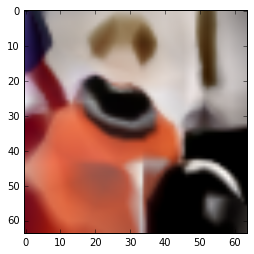

320 49.2483
321 48.9968
322 49.3671
323 47.788
324 50.7529
325 46.8782
326 51.8536
327 47.0451
328 47.5561
329 47.817
330 49.3391
331 52.223
332 47.3129
333 49.8228
334 46.5564
335 55.2878
336 47.1453
337 52.1156
338 50.9278
339 50.1631


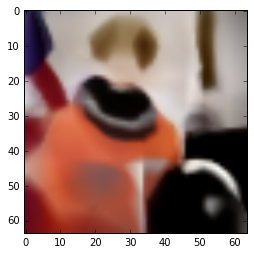

340 56.9778
341 47.3784
342 48.1399
343 48.8746
344 46.249
345 50.9082
346 46.4846
347 48.0838
348 49.2553
349 48.9741
350 50.5597
351 49.7789
352 48.3607
353 52.0053
354 50.9662
355 51.4607
356 49.9001
357 48.6645
358 46.146
359 48.3386


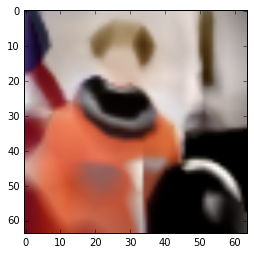

360 50.3384
361 48.4622
362 53.5852
363 45.2768
364 44.9909
365 50.4701
366 52.6814
367 51.1552
368 52.371
369 49.051
370 46.4946
371 44.1337
372 53.5128
373 47.5454
374 49.7579
375 45.2206
376 50.4113
377 52.5304
378 49.0095
379 44.4671


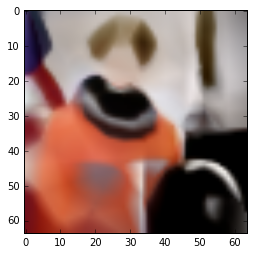

380 46.3168
381 51.1432
382 48.3909
383 45.5769
384 44.642
385 54.0212
386 44.9878
387 45.9175
388 48.8344
389 49.9073
390 45.7392
391 49.9554
392 43.4
393 46.5068
394 47.734
395 45.6451
396 44.7145
397 45.8819
398 46.5306
399 45.7041


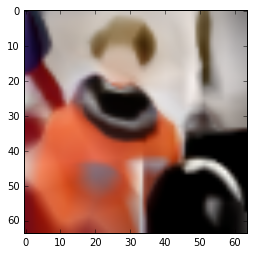

400 47.8563
401 46.8929
402 47.4724
403 41.1628
404 46.4014
405 48.7585
406 48.4768
407 42.4086
408 44.4329
409 43.5891
410 45.8564
411 45.9666
412 42.1716
413 44.4355
414 44.8558
415 44.7501
416 45.1661
417 44.2202
418 45.9844
419 43.7333


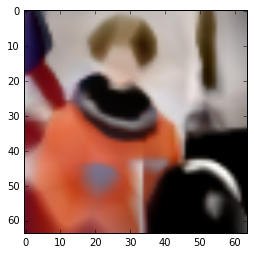

420 44.9015
421 43.8131
422 44.9016
423 40.3281
424 39.95
425 48.3182
426 44.6327
427 47.956
428 42.9109
429 44.3919
430 45.2473
431 45.9582
432 49.2834
433 48.9366
434 41.0631
435 43.6934
436 44.6667
437 44.0463
438 43.9153
439 43.4332


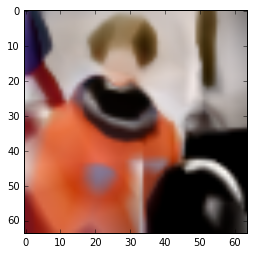

440 40.4579
441 44.9565
442 40.9231
443 42.2102
444 42.2761
445 42.5881
446 43.7014
447 44.8899
448 46.1491
449 46.0298
450 42.5329
451 43.9405
452 45.074
453 41.508
454 41.309
455 40.6549
456 40.4103
457 45.3309
458 43.2897
459 44.928


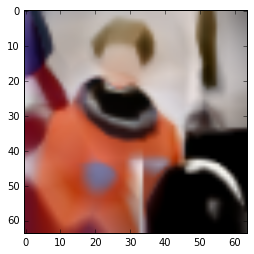

460 43.2972
461 40.1189
462 47.1388
463 44.393
464 38.5761
465 42.6254
466 49.7077
467 43.5831
468 45.0949
469 46.3674
470 48.2696
471 40.5631
472 40.7179
473 40.9795
474 38.2979
475 41.8969
476 42.5207
477 41.4356
478 42.9938
479 44.5781


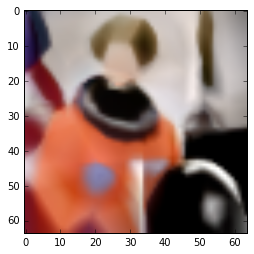

480 44.539
481 40.5045
482 44.5537
483 40.3865
484 42.5581
485 42.5685
486 40.3196
487 41.9667
488 39.4304
489 42.465
490 40.9856
491 39.327
492 40.2692
493 40.0641
494 38.2169
495 44.7721
496 42.5675
497 44.4815
498 39.6935
499 43.0405


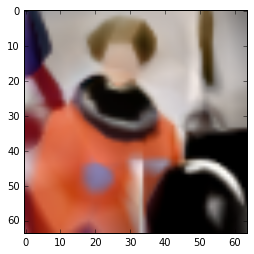

In [27]:
n_iterations = 500
batch_size = 50
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set W and b to their initial random normal value.
    sess.run(tf.initialize_all_variables())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
        print(it_i, training_cost)

        if (it_i + 1) % 20 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            fig, ax = plt.subplots(1, 1)
            img = np.clip(ys_pred.reshape(img.shape), 0, 255).astype(np.uint8)
            plt.imshow(img)
            plt.show()